In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
#Date
from datetime import datetime
import datetime as dt
#Warning
import warnings
warnings.filterwarnings("ignore")
#PLot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark", color_codes=True)
from dateutil.relativedelta import relativedelta
import mplfinance as mpf
from matplotlib.pyplot import figure

from download import data_crypto

In [ ]:
#En un mercado alcista
#Soporte: precio maximo que el mercado no va a llegar
#Resistencia: Precio minimo que el mercado no va a tocar
#En un mercado bajista es lo opuesto
#Soporte es el limite superior de la tendencia
#Resistencia es el limite inferior de la tendencia

En una tendencia alcista, cada vez hay mas maximos historicos (los nuevos maximos superan al anterior).
Y los nuevos minimos tambien son mayores a los minimos anteriores.
Entonces la nueva resistencia sera el ultimo minimo. 
Si rompe esa resistencia, el mercado cambia de una tendencia alcista hacia una bajista:
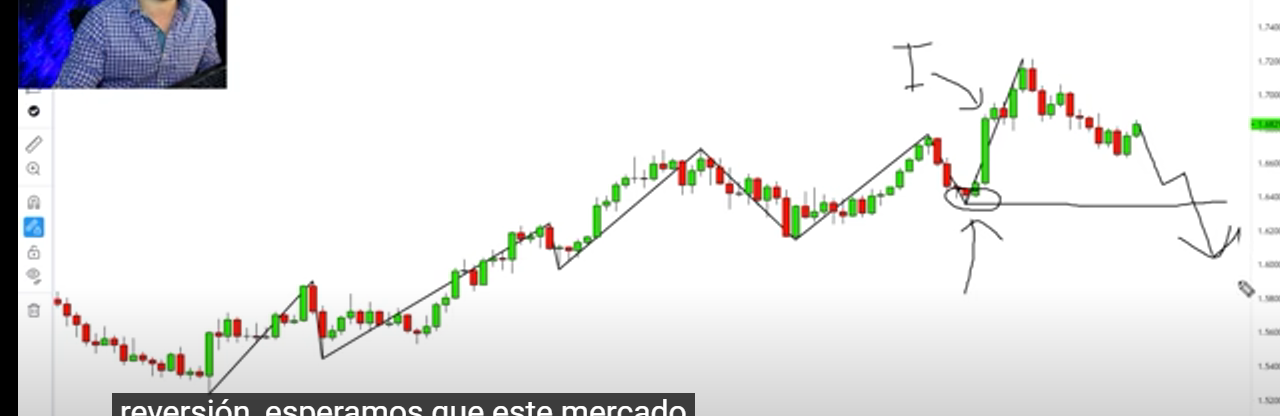
Se identifica una tendencia alcista cuando el maximo se supera:
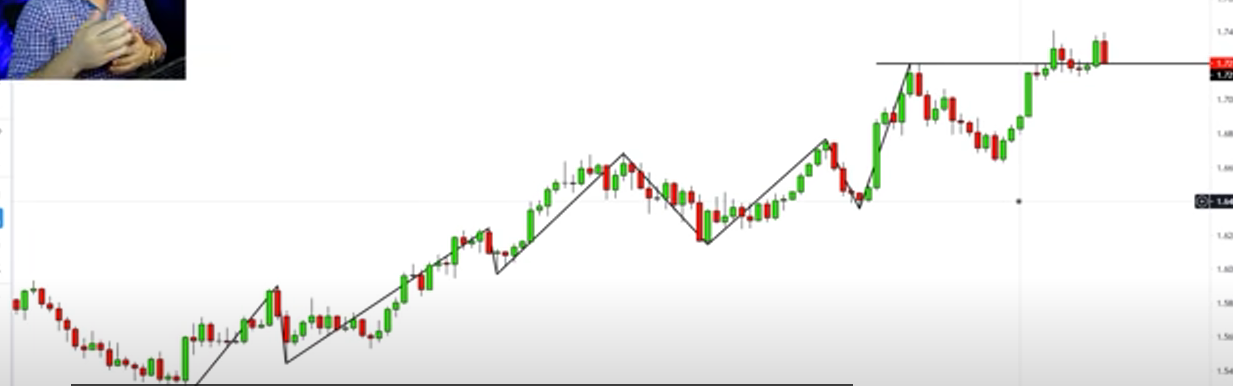
Viceversa con tendencia bajista:
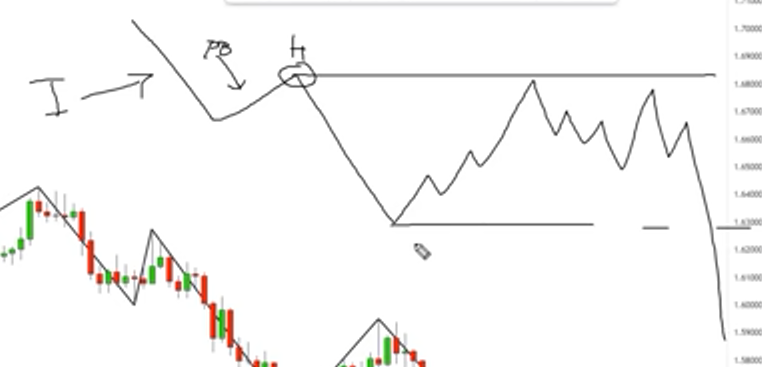
Tambien, en una tendencia alcista, la nueva resistencia sera el soporte anterior:
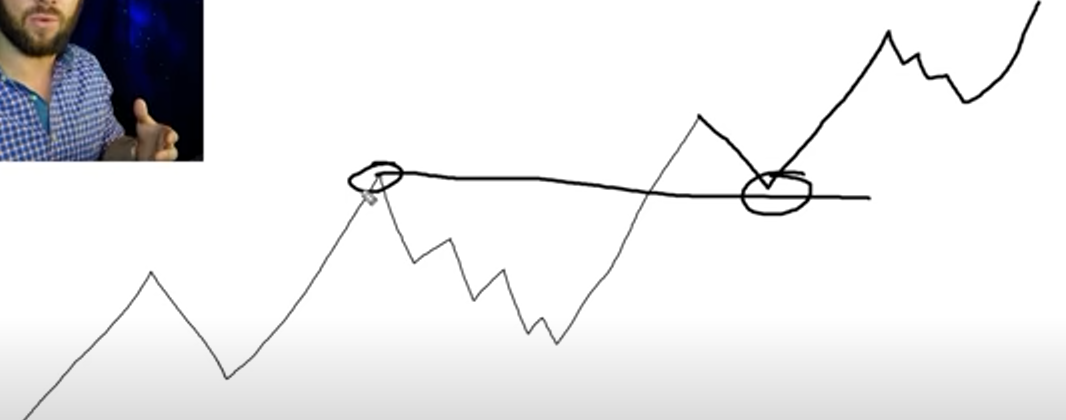
No significa que no rompa la resistencia o soporte, sino es para cubrirse frente al riesgo y poner un stop loss
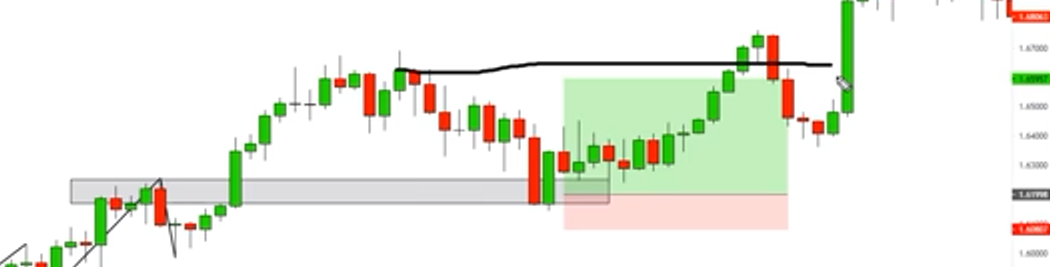
Si rompe la linea de abajo (el anterior minimo), ahi si se revierte la tendencia. Poner un stop loss en el medio.
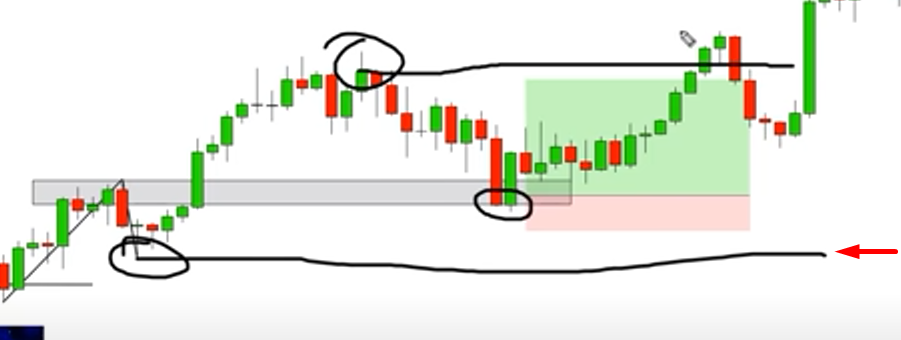
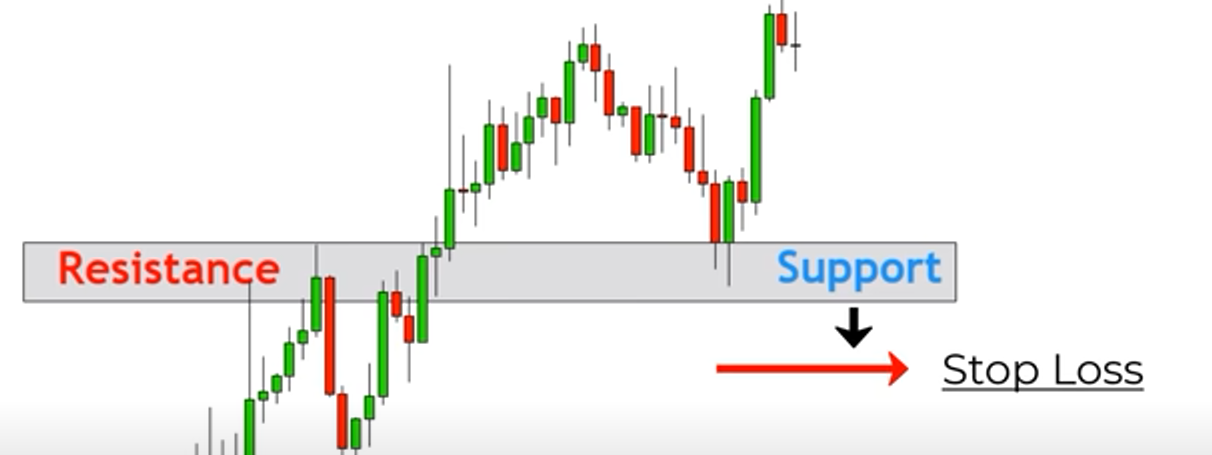

In [2]:
def resistencia(crypto, time, days_back, r_low_days, r_high_days):
    #r_low_days es para encontrar los valores minimos para 10, 30, 60 dias (ejemplo), 
    #es una lista con numeros que representan dias
    #r_high_days idem con valores maximos
    
    con = data_crypto.data_crypto()

    params = {"crypto": crypto,
              "days_back": days_back,
              "time": time}

    c_data = con.crypto_download(params)
    x = np.arange(0,len(c_data))
    fig, (ax, ax2) = plt.subplots(2, figsize=(12,6), gridspec_kw={'height_ratios': [1, 1]})

    for idx, val in c_data.iterrows():
        color = '#2CA453'
        if val['Open'] > val['Close']: color= '#F04730'
        # high/low lines
        ax.plot([x[idx], x[idx]], [val['Low'], val['High']], color=color)
        # open marker
        ax.plot([x[idx], x[idx]-0.1], [val['Open'], val['Open']], color=color)
        # close marker
        ax.plot([x[idx], x[idx]+0.1], [val['Close'], val['Close']], color=color)

    #Resistencia Bajista
    res_low_ls = []
    for i in r_low_days:
        resistence_value = c_data['Low'].iloc[-i:].min()
        ax.axhline(y=resistence_value, xmin=0, xmax=1, color='grey', linestyle = '-', label = resistence_value, alpha = 0.25)
        res_low_ls.append(resistence_value)
    #Resistencia Alcista
    res_high_ls = []
    for i in r_high_days:
        resistence_value = c_data['High'].iloc[-i:].max()
        ax.axhline(y=resistence_value, xmin=0, xmax=1, color='grey', linestyle = '-', label = resistence_value, alpha = 1)
        res_high_ls.append(resistence_value)
    ax.legend(loc='best')
    # ticks top plot
    d = round(days_back / 8)
    ax2.set_xticks(x[::d])
    ax2.set_xticklabels(c_data.Date.dt.date[::d])
    ax.set_xticks(x, minor=True)

    # plot volume
    ax2.bar(x, c_data['Volumen'], color='red', alpha = 0.5)
    # get max volume + 10%
    mx = c_data['Volumen'].max()*1.1
    # define tick locations - 0 to max in 4 steps
    yticks_ax2 = np.arange(0, mx+1, mx/4)
    # create labels for ticks. Replace 1.000.000 by 'mi'
    yticks_labels_ax2 = ['{:.2f} mil'.format(i/1000) for i in yticks_ax2]
    #ax2.yaxis.tick_right() # Move ticks to the left side
    # plot y ticks / skip first and last values (0 and max)
    plt.yticks(yticks_ax2[1:-1], yticks_labels_ax2[1:-1])
    plt.ylim(0,mx)

    # title
    ax.set_title(f'{crypto} Price Resistances', loc='left', fontsize=15)
    # no spacing between the subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    return(plt.show())

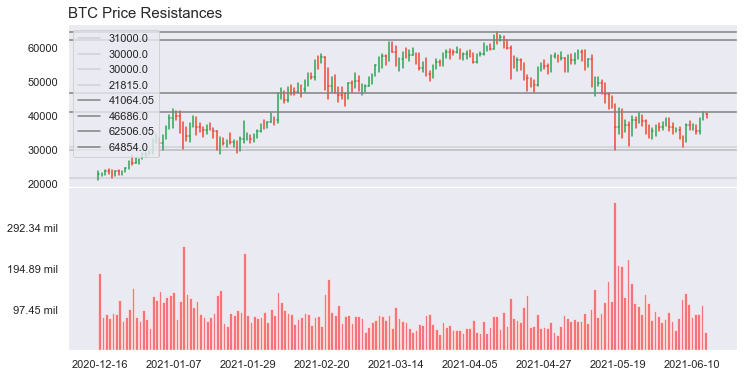

In [3]:
resistencia('BTC', '1DAY', 180, [10, 30, 60, 180], [10, 30, 60, 180])

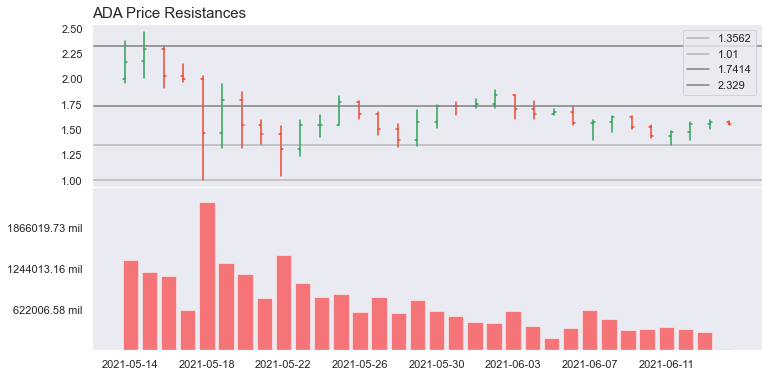

In [19]:
resistencia('ADA', '1DAY', 30, [10, 30], [10, 30])